# HBV model BMI calibration exercise with ERA5 forcing and GRDC observation

In this notebook you will calibrate your own HBV model using ERA5 forcing data and GRDC observation data


For forcing we use the eWaterCycle generic forcing generator. This can generate forcing data with ESMValTool from ERA5 data (if available on your machine), as well as CMIP6 data (which will be downloaded automatically). 

Here we use ERA5 and compare it to the observations of the GRDC for the Rhine basin. In the first cell we load all required dependencies and set a few parameters for this experiment

In [1]:
#from leakybucket.leakybucket_bmi import LeakyBucketBmi
import ewatercycle.forcing
import ewatercycle.observation.grdc
import ewatercycle.analysis
from pathlib import Path
from cartopy.io import shapereader
import pandas as pd
import numpy as np
from rich import print
import shutil
 
#shapefile that describes the basin we want to study.
shapeFile = Path(ewatercycle.__file__).parent / "testing/data/Rhine/Rhine.shp"

#location to save forcing results
saveLocation = Path("/home/rhut/forcingFiles/Rhine2000")

#GRDC station ID for the observation station
grdc_station_id = "6335020"  # GRDC station ID
basin_name = "Rhine"

#period of interest. Make sure that ERA5 is available on your machine for this period.
experiment_start_time="2000-01-01T00:00:00Z"
experiment_end_time="2000-12-31T00:00:00Z"


/opt/conda/envs/ewatercycle2/lib/python3.10/site-packages/esmvalcore/experimental/_warnings.py:13: UserWarning: 
  Thank you for trying out the new ESMValCore API.
  Note that this API is experimental and may be subject to change.
  More info: https://github.com/ESMValGroup/ESMValCore/issues/498


Forcing is created using the GenericLumpedForcing in eWaterCycle. This selects rainfall and precipitation from the indicated dataset for the given time period and averages over the indicated shape. The result is two NetCDF files and a yaml file. This can later be loaded using ```GenericLumpedForcing.load()```. 

In [2]:
ERA5_forcing = ewatercycle.forcing.sources["LumpedMakkinkForcing"].generate(
    dataset="ERA5",
    start_time=experiment_start_time,
    end_time=experiment_end_time,
    shape=shapeFile.absolute(),
)


In [3]:
print(ERA5_forcing)

LumpedMakkinkForcing(
    start_time='2000-01-01T00:00:00Z',
    end_time='2000-12-31T00:00:00Z',
    directory=PosixPath('/home/rhut/repos/teaching-materials/teaching-files/esmvaltool_output/ewcrepcb8knyme_202403
27_205921/work/diagnostic/script'),
    shape=PosixPath('/home/rhut/.local/lib/python3.10/site-packages/ewatercycle/testing/data/Rhine/Rhine.shp'),
    filenames={
        'pr': 'OBS6_ERA5_reanaly_1_day_pr_2000-2000.nc',
        'tas': 'OBS6_ERA5_reanaly_1_day_tas_2000-2000.nc',
        'rsds': 'OBS6_ERA5_reanaly_1_day_rsds_2000-2000.nc',
        'evspsblpot': 'Derived_Makkink_evspsblpot.nc'
    }
)

Let's make a plot to look at this forcing

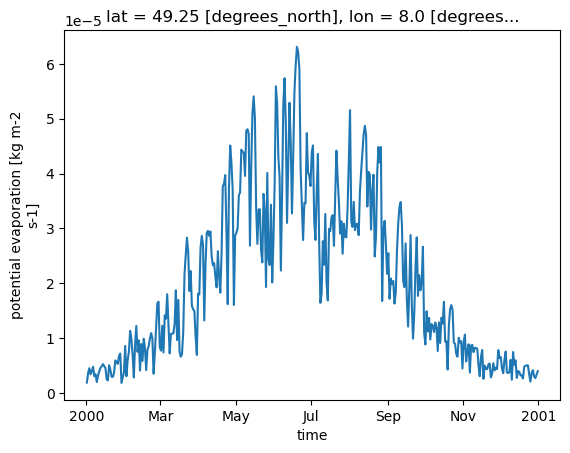

In [4]:
ERA5_forcing.to_xarray()["evspsblpot"].plot()

Finally, the forcing is saved deep in an ESMValTool directory. For easy loading in other notebooks, let's save it in a better location.

In [5]:
shutil.copytree(ERA5_forcing.directory,saveLocation)

PosixPath('/home/rhut/forcingFiles/Rhine2000')